In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [2]:
#path='http://localhost:8888/edit/Downloads/Unemployment%20in%20India.csv#'
df= pd.read_csv("Downloads/Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
# Printing column names to identify any issues
print("Original Column Names:")
print(df.columns)

# Removing any leading or trailing spaces from column names so it can be more readable
df.columns = df.columns.str.strip()

# Print column names to confirm the changes
print("\nCleaned Column Names:")
print(df.columns)

Original Column Names:
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

Cleaned Column Names:
Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [17]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Basic statistics to identify any outliers
print("\nSummary statistics:")
print(df.describe())

Missing values in each column:
Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

Summary statistics:
       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count

Unemployement rate by Region


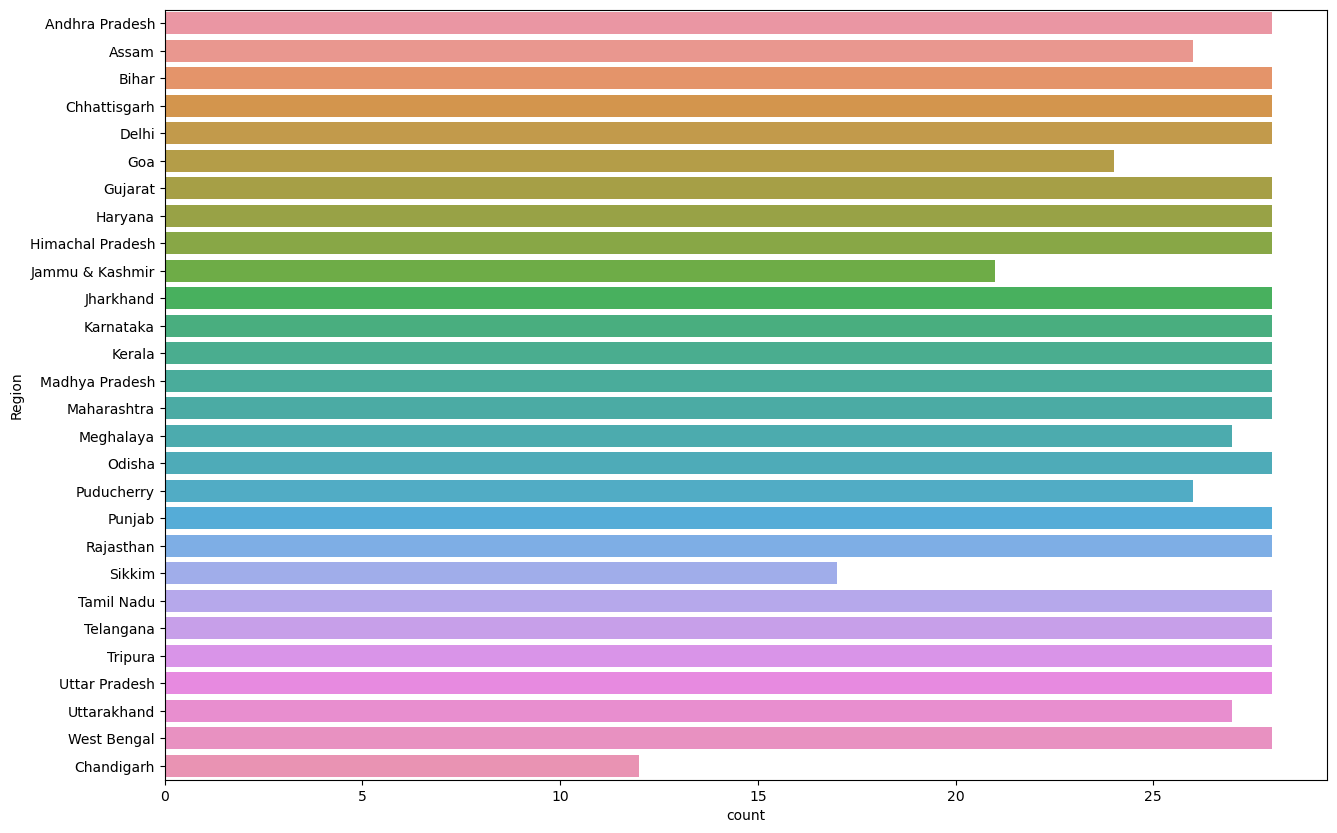

In [14]:
print("Unemployement rate by Region:")
plt.figure(figsize=(15,10))
sns.countplot(y="Region",data=df)
plt.show()


In [7]:
avg_unemployment_rate=df.groupby('Region')['Estimated Unemployment Rate (%)'].mean()
state_with_highest_unemployment=avg_unemployment_rate.idxmax()
high_unemployment_rate=avg_unemployment_rate.max()
state_with_lowest_unemployment=avg_unemployment_rate.idxmin()
low_unemploy_rate=avg_unemployment_rate.min()
print(f"state  with  high employment : {state_with_highest_unemployment}")
print(f"high employment rate : {high_unemployment_rate}")
print(f"state  with  low employment : {state_with_lowest_unemployment}")
print(f"low employment rate : {low_unemploy_rate}")


state  with  high employment : Tripura
high employment rate : 28.350357142857142
state  with  low employment : Meghalaya
low employment rate : 4.7988888888888885


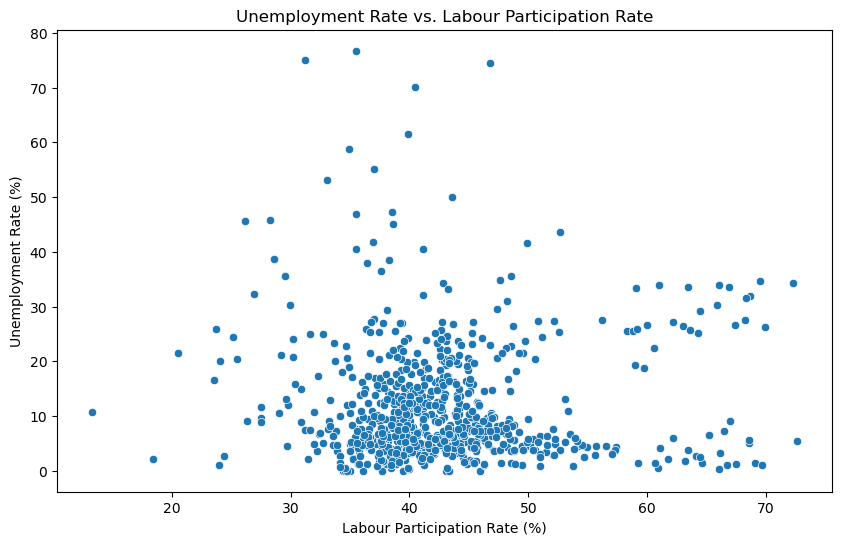

Correlation between Labour Participation Rate and Unemployment Rate: 0.00


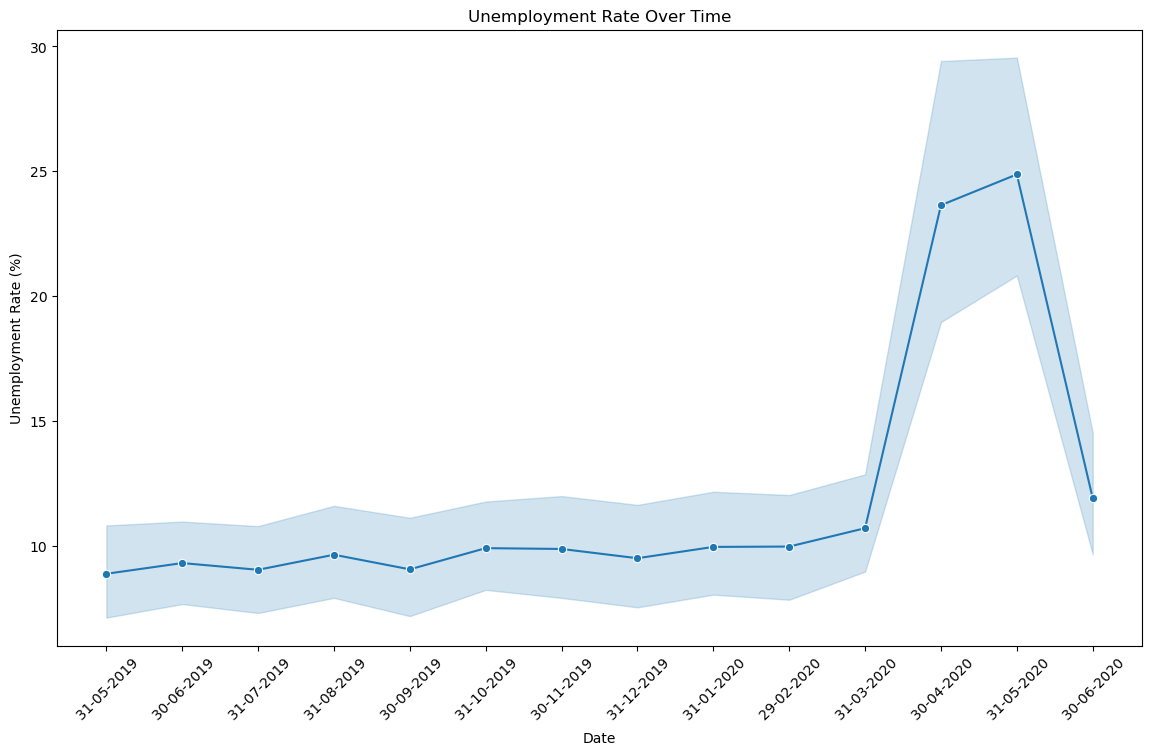

In [8]:
# Trend of Unemployment Rate Over Time
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df, marker='o')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

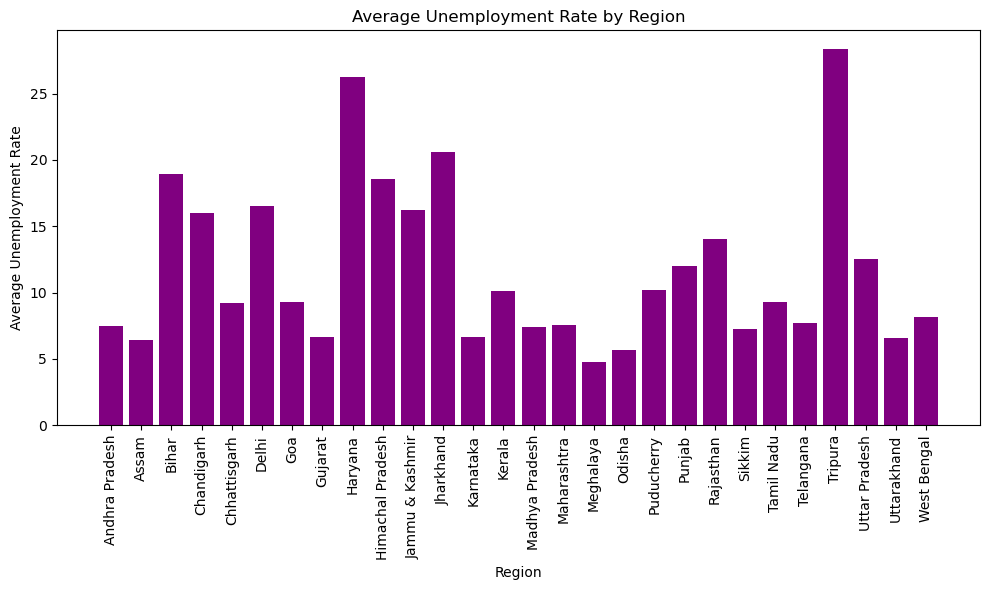

In [10]:
regions = avg_unemployment_rate.index
avg_rates = avg_unemployment_rate.values

plt.figure(figsize=(10, 6))
plt.bar(regions, avg_rates, color='purple')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by Region')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

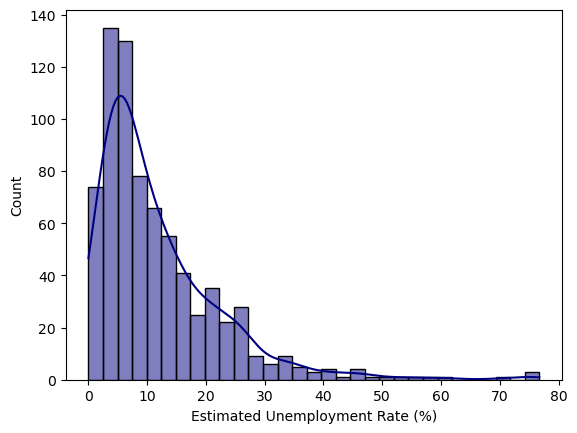

In [11]:
sns.histplot(data=df, x="Estimated Unemployment Rate (%)", kde=True,color="navy")
plt.show()

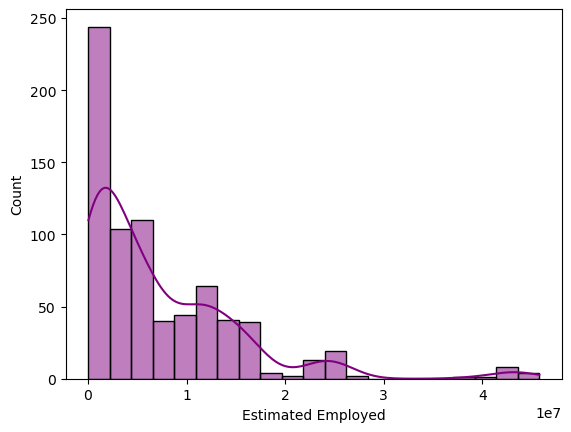

In [13]:
sns.histplot(data=df, x="Estimated Employed", kde=True,color="purple")
plt.show()